In [1]:
## Imports
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('autotrader_master_10182020.csv')

In [3]:
data.shape

(11657, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    11657 non-null  int64  
 1   year          11490 non-null  float64
 2   make          11490 non-null  object 
 3   model         11657 non-null  object 
 4   adid          11657 non-null  int64  
 5   price         11490 non-null  float64
 6   mileage       11490 non-null  float64
 7   location      11657 non-null  object 
 8   transmission  11490 non-null  object 
 9   drivetrain    11032 non-null  object 
 10  body_type     10695 non-null  object 
 11  colour        6296 non-null   object 
 12  fuel_economy  9580 non-null   float64
 13  price_delta   9051 non-null   float64
 14  more_less     11657 non-null  object 
dtypes: float64(5), int64(2), object(8)
memory usage: 1.3+ MB


In [5]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
data.head()

In [289]:
## Clean mileage column to be ready to convert to int
data['mileage'] = data['mileage'].replace(['Not',np.nan],data['mileage'].mean())\
.astype(int)

In [7]:
## Create new column ['price_sugguest'] by using ['price','price_delta',more_less]

# convert data['price_delta'] to int for further calculation
data['price_delta'] = data['price_delta'].replace([np.nan,'missing'],0).astype(int)

In [8]:
# use .loc[] to loop through all the rows

for i in range(len(data)):
    
    if data.loc[i,'more_less'] == 'BELOW':
        data.loc[i,'price_suggest'] = data.loc[i,'price'] \
                              + data.loc[i,'price_delta']
    elif data.loc[i,'more_less'] == 'ABOVE':
        data.loc[i,'price_suggest'] = data.loc[i,'price'] \
                              - data.loc[i,'price_delta']
    else:
        data.loc[i,'price_suggest'] = 'missing'

In [9]:
## Create new column ['continent'] to assign each make
data['make'].unique()

array(['Infiniti', 'Mercedes-Benz', 'Honda', 'Kia', 'Nissan', 'Dodge',
       'Jeep', 'Audi', 'Ford', 'Chevrolet', 'Buick', 'Subaru', 'BMW',
       'Mazda', 'Toyota', 'Fiat', 'Lincoln', 'Hyundai', 'Chrysler',
       'Mitsubishi', 'Volkswagen', 'Lexus', 'Jaguar', 'Acura', 'Land',
       'Ram', 'Porsche', 'GMC', 'Tesla', 'Volvo', 'MINI', 'Cadillac',
       'Lamborghini', 'Scion', 'Aston', 'Maserati', 'Alfa', 'Genesis',
       'smart', 'Ferrari', 'McLaren', 'Bentley', 'Rolls-Royce', nan,
       'Hino'], dtype=object)

In [10]:
make_list = ['Infiniti', 'Mercedes-Benz', 'Honda', 'Kia', 'Nissan', 'Dodge',
       'Jeep', 'Audi', 'Ford', 'Chevrolet', 'Buick', 'Subaru', 'BMW',
       'Mazda', 'Toyota', 'Fiat', 'Lincoln', 'Hyundai', 'Chrysler',
       'Mitsubishi', 'Volkswagen', 'Lexus', 'Jaguar', 'Acura', 'Land',
       'Ram', 'Porsche', 'GMC', 'Tesla', 'Volvo', 'MINI', 'Cadillac',
       'Lamborghini', 'Scion', 'Aston', 'Maserati', 'Alfa', 'Genesis',
       'smart', 'Ferrari', 'McLaren', 'Bentley', 'Rolls-Royce', 'Hino']

In [11]:
asia = ['Subaru','Nissan','Hyundai','Honda','Toyota','Kia','Lexus','Mazda','Scion','Acura','Infiniti','Mitsubishi','Genesis','Hino']

america = ['Dodge','Ram','Ford','Jeep','Chevrolet','GMC','Tesla','Buick','Chrysler','Cadillac','Fiat','Lincoln']

europe = ['Volkswagen','Audi','Land','Alfa','MINI', 'Jaguar','Porsche','Volvo','Mercedes-Benz', 'BMW', 'Ferrari','McLaren', 'Bentley', 'Aston', 'smart', 'Maserati', 'Rolls-Royce','Lamborghini']

In [12]:
# iterate through each row
for i in range(len(data)):
    if data.loc[i,'make'] in asia:
        data.loc[i,'continent'] = 'Asia'
    elif data.loc[i,'make'] in america:
        data.loc[i,'continent'] = 'America'
    elif data.loc[i,'make'] in europe:
        data.loc[i,'continent'] = 'Europe'
    else:
        data.loc[i,'continent'] = 'Else'

In [13]:
## Create column ['price_ratio'] for further calculation
for i in range(len(data)):
    if data.loc[i,'price_suggest'] == 'missing':
        data.loc[i,'price_ratio'] = 0
    else:
        data.loc[i,'price_ratio'] = (data.loc[i,'price']\
                   /data.loc[i,'price_suggest']).round(2)

In [229]:
## Create column ['price_comment'] based on the ['price_ratio']

# create a list of conditions
conditions_pr = [
    (data['price_ratio'] < 0.8)& (data['price_ratio'] > 0),
    (data['price_ratio'] < 0.9) & (data['price_ratio'] >= 0.75),
    (data['price_ratio'] < 1  ) & (data['price_ratio'] >= 0.9),
    (data['price_ratio'] < 1.1) & (data['price_ratio'] >= 1),
    (data['price_ratio'] < 1.17) & (data['price_ratio'] >=1.1),
    (data['price_ratio'] >= 1.17 ),
    (data['price_ratio'] == 0)
]
# create a list of comment
values_comment = ['Excellent Deal!','Great Price','Good Price',\
                  'Fair Price','Above Average','Bad Deal','No Comparison']

data['price_comment'] = np.select(conditions_pr,values_comment)

In [15]:
data['body_type'].value_counts()

SUV            4581
Sedan          3190
Hatchback       899
Truck           731
Minivan         491
Wagon           367
Coupe           342
Convertible      94
Name: body_type, dtype: int64

In [16]:
## Merge wagon and hatchback into Sedan (They are technically Sedan anyway)
data['body_type'] = data['body_type'].replace(['Hatchback','Wagon'],'Sedan')


In [189]:
### These function will filter the dataframe for the make and body_type specified
# and return a dataframe groupby the year and perform the mean() calculation
def get_yearly_makebodytype(df, make, bodytype):
    return df[(df['make'] == make) & (df['body_type'] == bodytype) & (df['year'] < 2020)]\
           .groupby('year').mean()

def get_yearly_continentbodytype(df, continent, bodytype):
    return df[(df['continent'] == continent) & (df['body_type'] == bodytype) & (df['year'] < 2020)]\
            .groupby('year').mean()

def get_yearly_model(df, model):
    return df[(df['model'] == model) & (df['year'] < 2020)].groupby('year').mean()

In [86]:
## functions to remove outliers with IQR
def outlier_filter(df, q =0.05):
    upper = df.quantile(1-q)
    lower = df.quantile(q)
    mask = (df < upper) & (df > lower)
    return mask

In [209]:
### These function will filter the dataframe for the make and body_type specified
# and return a dataframe groupby the year and perform the mean() calculation after IQR fiter
def get_yearly_continentbodytype_IQR(df, continent, bodytype):
    df_temp = df[(df['continent'] == continent) & (df['body_type'] == bodytype) & (df['year'] < 2020)]
    mask = outlier_filter(df_temp['price'], 0.05)
    return df_temp[mask].groupby('year').mean()


def get_yearly_makebodytype_IQR(df, make, bodytype):
    df_temp = df[(df['make'] == make) & (df['body_type'] == bodytype) & (df['year'] < 2020)]
    mask = outlier_filter(df_temp['price'], 0.05)
    return df_temp[mask].groupby('year').mean()

def get_yearly_model_IQR(df, model):
    df_temp = df[(df['model'] == model) & (df['year'] < 2020)]
    mask = outlier_filter(df_temp['price'], 0.05)
    return df_temp[mask].groupby('year').mean()

In [201]:
Asiasedan_IQR = get_yearly_continentbodytype_IQR(data,'Asia','Sedan')
Europesedan_IQR = get_yearly_continentbodytype_IQR(data,'Europe','Sedan')
Americasedan_IQR = get_yearly_continentbodytype_IQR(data,'America','Sedan')

In [202]:
Asiasedan = get_yearly_continentbodytype(data,'Asia','Sedan')
Europesedan = get_yearly_continentbodytype(data,'Europe','Sedan')
Americasedan = get_yearly_continentbodytype(data,'America','Sedan')

In [115]:
Asiasedan['price']

year
2013.0     9988.0
2014.0    10549.0
2015.0    12887.5
2016.0    14945.0
2017.0    16910.5
2018.0    18980.0
2019.0    20940.5
2020.0    20849.0
2021.0    28477.0
Name: price, dtype: float64

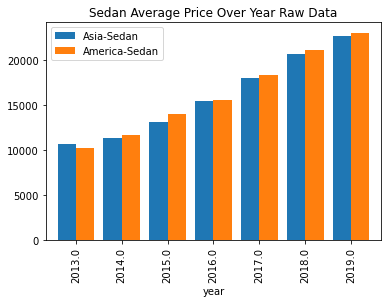

In [203]:
combinesedan = pd.DataFrame({'Asia-Sedan':Asiasedan['price'], \
                           #  'Europe-Sedan':Europesedan['price'],\
                             'America-Sedan':Americasedan['price']})
combinesedan.plot(kind = 'bar', width = 0.8, align = 'center', title = 'Sedan Average Price Over Year Raw Data');

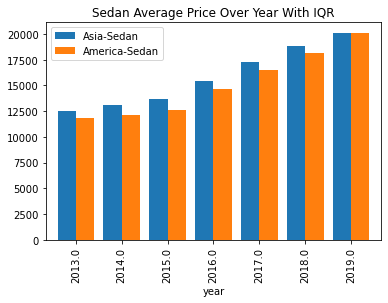

In [247]:
combinesedan_IQR = pd.DataFrame({'Asia-Sedan': Asiasedan_IQR['price'], \
                                # 'Europe-Sedan': Europesedan_IQR['price'],\
                                 'America-Sedan': Americasedan_IQR['price']})
combinesedan_IQR.plot(kind = 'bar', width = 0.8, align = 'center', title = 'Sedan Average Price Over Year With IQR');

In [140]:
def get_yearly_continentbodytype_IQR(df, continent, bodytype):
    df_temp = df[(df['continent'] == continent) & (df['body_type'] == bodytype)]
    mask = outlier_filter(df_temp['price'])
    return df_temp[mask].groupby('year').mean()

In [267]:
withIQRfilter = get_yearly_continentbodytype_IQR(data,'Asia','Sedan')['price']

In [268]:
noIQRfilter = get_yearly_continentbodytype(data,'Asia','Sedan')['price']

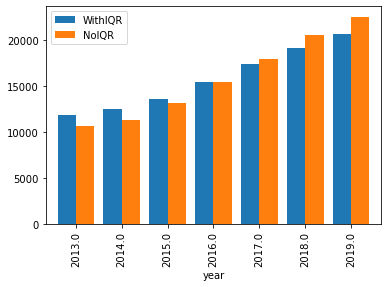

In [269]:
IQRcomparison = pd.DataFrame({'WithIQR':withIQRfilter, 'NoIQR': noIQRfilter})
IQRcomparison.plot(kind = 'bar', width = 0.8, align = 'center');

In [145]:
sedan2013 = Asiasedan_temp[Asiasedan_temp['year'] == 2013.0]['price']

In [146]:
sedan2014 = Asiasedan_temp[Asiasedan_temp['year'] == 2014.0]['price']

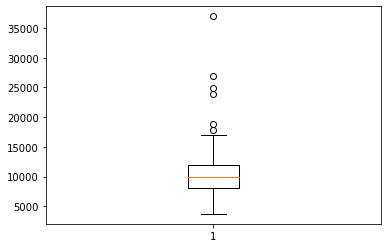

In [150]:
plt.boxplot(sedan2013);

(array([23., 68., 38., 22.,  2.,  0.,  3.,  0.,  0.,  1.]),
 array([ 3700.,  7029., 10358., 13687., 17016., 20345., 23674., 27003.,
        30332., 33661., 36990.]),
 <a list of 10 Patch objects>)

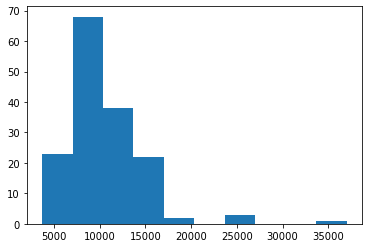

In [139]:
plt.hist(sedan2013)

(array([26., 53., 45., 24.,  8.,  4.,  1.,  3.,  1.,  1.]),
 array([ 4800. ,  7518.8, 10237.6, 12956.4, 15675.2, 18394. , 21112.8,
        23831.6, 26550.4, 29269.2, 31988. ]),
 <a list of 10 Patch objects>)

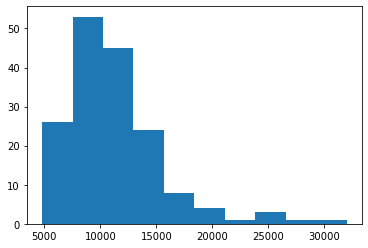

In [147]:
plt.hist(sedan2014)

In [210]:
Asiasuv = get_yearly_continentbodytype(data,'Asia','SUV')
Europesuv = get_yearly_continentbodytype(data,'Europe','SUV')
Americasuv = get_yearly_continentbodytype(data,'America','SUV')
Asiasuv_IQR = get_yearly_continentbodytype_IQR(data,'Asia','SUV')
Europesuv_IQR = get_yearly_continentbodytype_IQR(data,'Europe','SUV')
Americasuv_IQR = get_yearly_continentbodytype_IQR(data,'America','SUV')

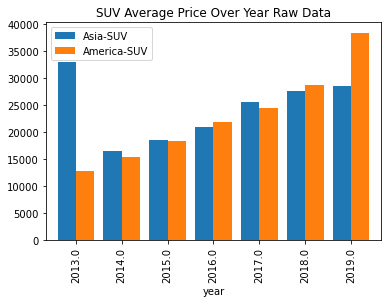

In [211]:
suv_NoIQR = pd.DataFrame({'Asia-SUV':Asiasuv['price'], \
                          # 'Europe-SUV':Europesuv['price'],\
                           'America-SUV':Americasuv['price']})
suv_NoIQR.plot(kind = 'bar', width = 0.8, align = 'center', title = 'SUV Average Price Over Year Raw Data');


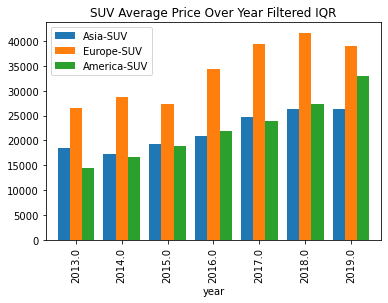

In [212]:

suv_WithIQR = pd.DataFrame({'Asia-SUV':Asiasuv_IQR['price'], \
                           'Europe-SUV':Europesuv_IQR['price'],\
                           'America-SUV':Americasuv_IQR['price']})
suv_WithIQR.plot(kind = 'bar', width = 0.8, align = 'center', title = 'SUV Average Price Over Year Filtered IQR');

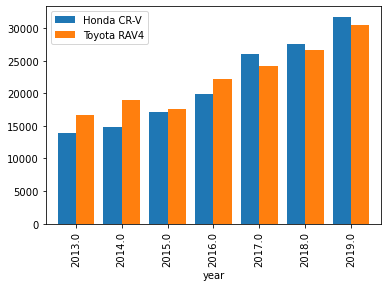

In [213]:
crv = get_yearly_model(data,'CR-V')
rav4 = get_yearly_model(data,'RAV4')
subcompactsuv = pd.DataFrame({'Honda CR-V':crv['price'],'Toyota RAV4':rav4['price']})
subcompactsuv.plot(kind = 'bar', width = 0.8, align = 'center');

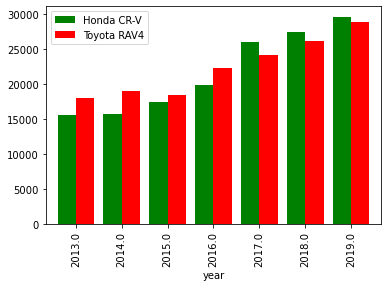

In [288]:
crv_IQR = get_yearly_model_IQR(data,'CR-V')
rav4_IQR = get_yearly_model_IQR(data,'RAV4')
subcompactsuv_IQR = pd.DataFrame({'Honda CR-V':crv_IQR['price'],'Toyota RAV4':rav4_IQR['price']})
subcompactsuv_IQR.plot(kind = 'bar', width = 0.8, align = 'center',color=['green', 'red']);

In [230]:
data['price_comment'].value_counts()

Good Price         4052
Fair Price         2665
No Comparison      2606
Great Price        1434
Above Average       654
Excellent Deal!     126
Bad Deal            120
Name: price_comment, dtype: int64

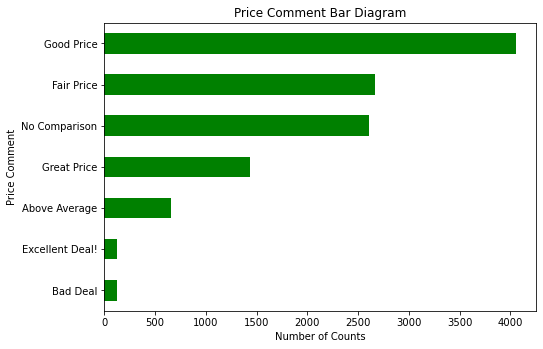

In [260]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
data['price_comment'].value_counts().plot(kind = 'barh', color = 'green');
axes.set_xlabel('Number of Counts')
axes.set_ylabel('Price Comment')
axes.set_title('Price Comment Bar Diagram')
axes.invert_yaxis();

In [266]:
data[['adid','year','make','model','price','price_delta','more_less']].head(6)

,adid,year,make,model,price,price_delta,more_less
0,49667893,2017.0,Infiniti,QX30,24788.0,1722,ABOVE
1,49666761,2014.0,Mercedes-Benz,C-Class,17498.0,694,BELOW
2,49647361,2016.0,Honda,Odyssey,27888.0,963,ABOVE
3,49676108,2015.0,Kia,Soul,13880.0,0,missing
4,49641921,2019.0,Honda,Civic,22395.0,847,BELOW
5,49674691,2018.0,Nissan,Rogue,19999.0,0,missing
